In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import  SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import joblib
import numpy as np

In [2]:
data_path = "./waste management.csv"
df = pd.read_csv(data_path)
df.head()

,waste_type,material_composition,recycling_potential,toxicity_level,management_strategy
0,3,0.198716,0.016588,81.011339,0
1,1,0.005522,0.512093,86.707232,0
2,3,0.815461,0.226496,91.324055,0
3,3,0.706857,0.645173,51.134240,0
4,1,0.729007,0.174366,50.151629,0


In [4]:
df.isna().sum()

waste_type              0
material_composition    0
recycling_potential     0
toxicity_level          0
management_strategy     0
dtype: int64

In [18]:
df.describe()

,waste_type,material_composition,recycling_potential,toxicity_level,management_strategy
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.980000,0.477581,0.529666,47.812564,0.130000
std,0.803779,0.288436,0.296389,28.515740,0.337998
min,1.000000,0.005522,0.005062,1.439349,0.000000
25%,1.000000,0.239081,0.263387,23.975350,0.000000
50%,2.000000,0.491624,0.569185,50.723933,0.000000
75%,3.000000,0.729157,0.783609,69.747237,0.000000
max,3.000000,0.985650,0.990054,97.585208,1.000000


In [20]:
df["waste_type"].unique()

array([3, 1, 2])

In [21]:
df["waste_type"].value_counts()

waste_type
2    36
1    33
3    31
Name: count, dtype: int64

In [19]:
df["management_strategy"].unique()

array([0, 1])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   waste_type            100 non-null    int64  
 1   material_composition  100 non-null    float64
 2   recycling_potential   100 non-null    float64
 3   toxicity_level        100 non-null    float64
 4   management_strategy   100 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 4.0 KB


In [ ]:
df.columns

Index(['waste_type', 'material_composition', 'recycling_potential',
       'toxicity_level', 'management_strategy'],
      dtype='object')

In [7]:
df["management_strategy"].value_counts()

management_strategy
0    87
1    13
Name: count, dtype: int64

In [13]:
df["waste_type"].head()

0    3
1    1
2    3
3    3
4    1
Name: waste_type, dtype: int64

<BarContainer object of 100 artists>

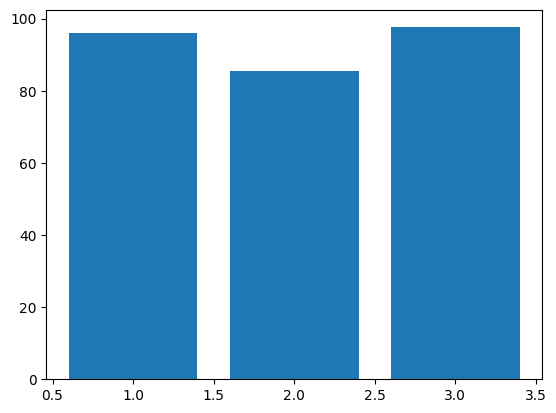

In [ ]:
plt.bar(df["waste_type"],df['toxicity_level'])

In [22]:
df['material_composition'].skew()

np.float64(0.057268549067348865)

<Axes: xlabel='material_composition', ylabel='Count'>

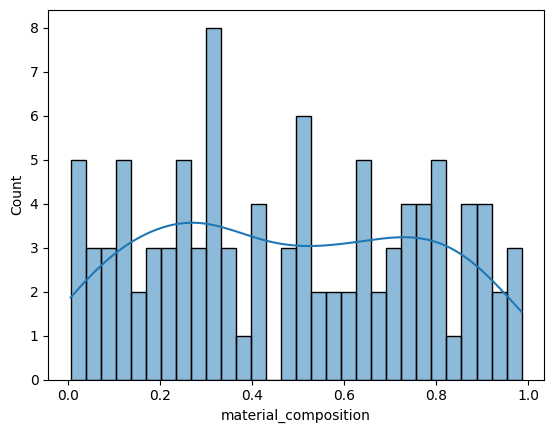

In [26]:
import seaborn as sns

sns.histplot(df['material_composition'], kde=True, bins=30)

In [41]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [46]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


d:\Edunet\EdunetEnv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9


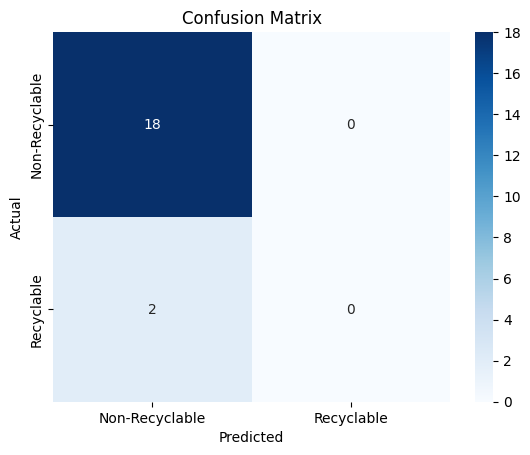

In [49]:

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Recyclable', 'Recyclable'], 
            yticklabels=['Non-Recyclable', 'Recyclable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [50]:
print(classification_report(y_test, y_pred, target_names=['Non-Recyclable', 'Recyclable']))


                precision    recall  f1-score   support

Non-Recyclable       0.90      1.00      0.95        18
    Recyclable       0.00      0.00      0.00         2

      accuracy                           0.90        20
     macro avg       0.45      0.50      0.47        20
  weighted avg       0.81      0.90      0.85        20



d:\Edunet\EdunetEnv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Edunet\EdunetEnv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Edunet\EdunetEnv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [52]:

import joblib
# Save the model to a file
joblib.dump(model, 'waste management_model.pkl')

['waste management_model.pkl']

(-1.0, 3.5)

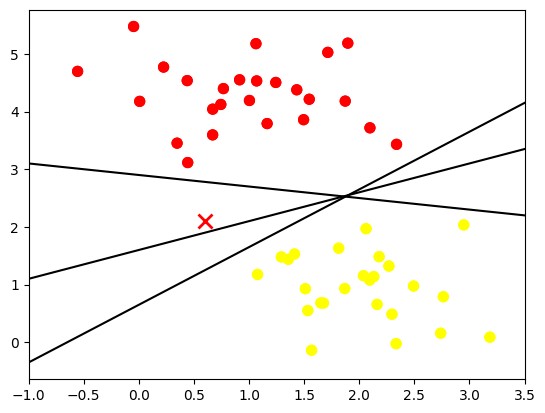

In [ ]:
### scratch understanding of the model

from sklearn.datasets import make_blobs


from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')


xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)